                  CLASSIFICATION OF BREAST CANCER 


Problem Statement : Usually classifying the cancer into benign or malignant to proceed further diagnosis 
    requires a highly experienced doctor. But with the help of the digital image of the cancer cell lump
    and drawing features from that image gives data to analyse and predict the class of the cancer. After
    drawing features from several images of wisconsin cancer patients ,10 main characteristics were
    selected and their data was stored. We have the data of 570 unknown breast cancer patients.
    Using machine learning techniques with python, we are going  to analyse the data and predict
    the cancer class for the future patients.

                           DATA ANALYSIS

For applying the machine learning techniques on the dataset, we need to preprocess and wrangle the
data to get a better dataset. For analysing the dataset we need certain python libraries and packages like 
pandas which is useful for data manipulation and analysis, numpy for mathematical operations on dataset, matplotlib for data visualisation, seaborn for making heatmaps. sklearn package for normalisation of dataset.

PREPROCESSING OF DATA :  we will import neccessary libraries and packages for data analysis

In [0]:
import pandas as pd # for importing dataset from local database
import numpy as np # for performing mathematical operations on dataset
import matplotlib.pyplot as plt # for data visulaisation
import seaborn as sns # for drawing plots and heatmaps
from sklearn.preprocessing import StandardScaler #for normalisation of dataset
%matplotlib inline  
# to get the plots in the jupyternotebook



READING THE DATA:    we will import  the raw data which is in csv format from local database using pandas
                   library and read it. Here the name of  the dataset is "bc.csv".  here bc.csv dataset will                    be changed to "df" dataframe.

In [0]:
df=pd.read_csv('bc.csv')

REMOVE UNNECESSARY COLUMS FROM DATAFRAME : there are some columns in dataframe which are unnecessary. 
    we need to remove those columns using drop function of pandas library.

In [0]:
df.drop("id",axis = 1 , inplace = True) # here we have removed id column 

CHANGING CATEGORICAL VALUES TO NUMERICAL VALUES : To know the data type of columns , we use  dtypes function.from that we get the columns with object datatype and we convert them into numerical values.

In [0]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

From above result we got one object type column, diagnosis. diagnosis has two values M and B . we map
them to  values 1 and 0 respectively using map function.

In [0]:
df["diagnosis"] = df["diagnosis"].map({"M": 1,"B" : 0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


IDENTIFYING AND HANDLING THE MISSING VALUES :  As the data was collected from different sources, there may
    be  some missing data which has to be replaced or dropped  to get better prediction. here we replace 
    the missing data with the mean of that column. we have to do this operation to all the columns of
    the dataframe.

In [0]:
columnlist = df.columns.tolist()
columnlist.remove("diagnosis")
for i  in columnlist : 
    mean = df[i].mean()
    df[i].replace(0, mean)
# here we have replaced all the 0 values to their respective column means. 
df1 = df.drop('diagnosis',axis =1,inplace = False)

CORRELATION : correlation means measure of the interdependence between any two features of dataset.
we use heatmap to measure the strength of the correlation between two features .

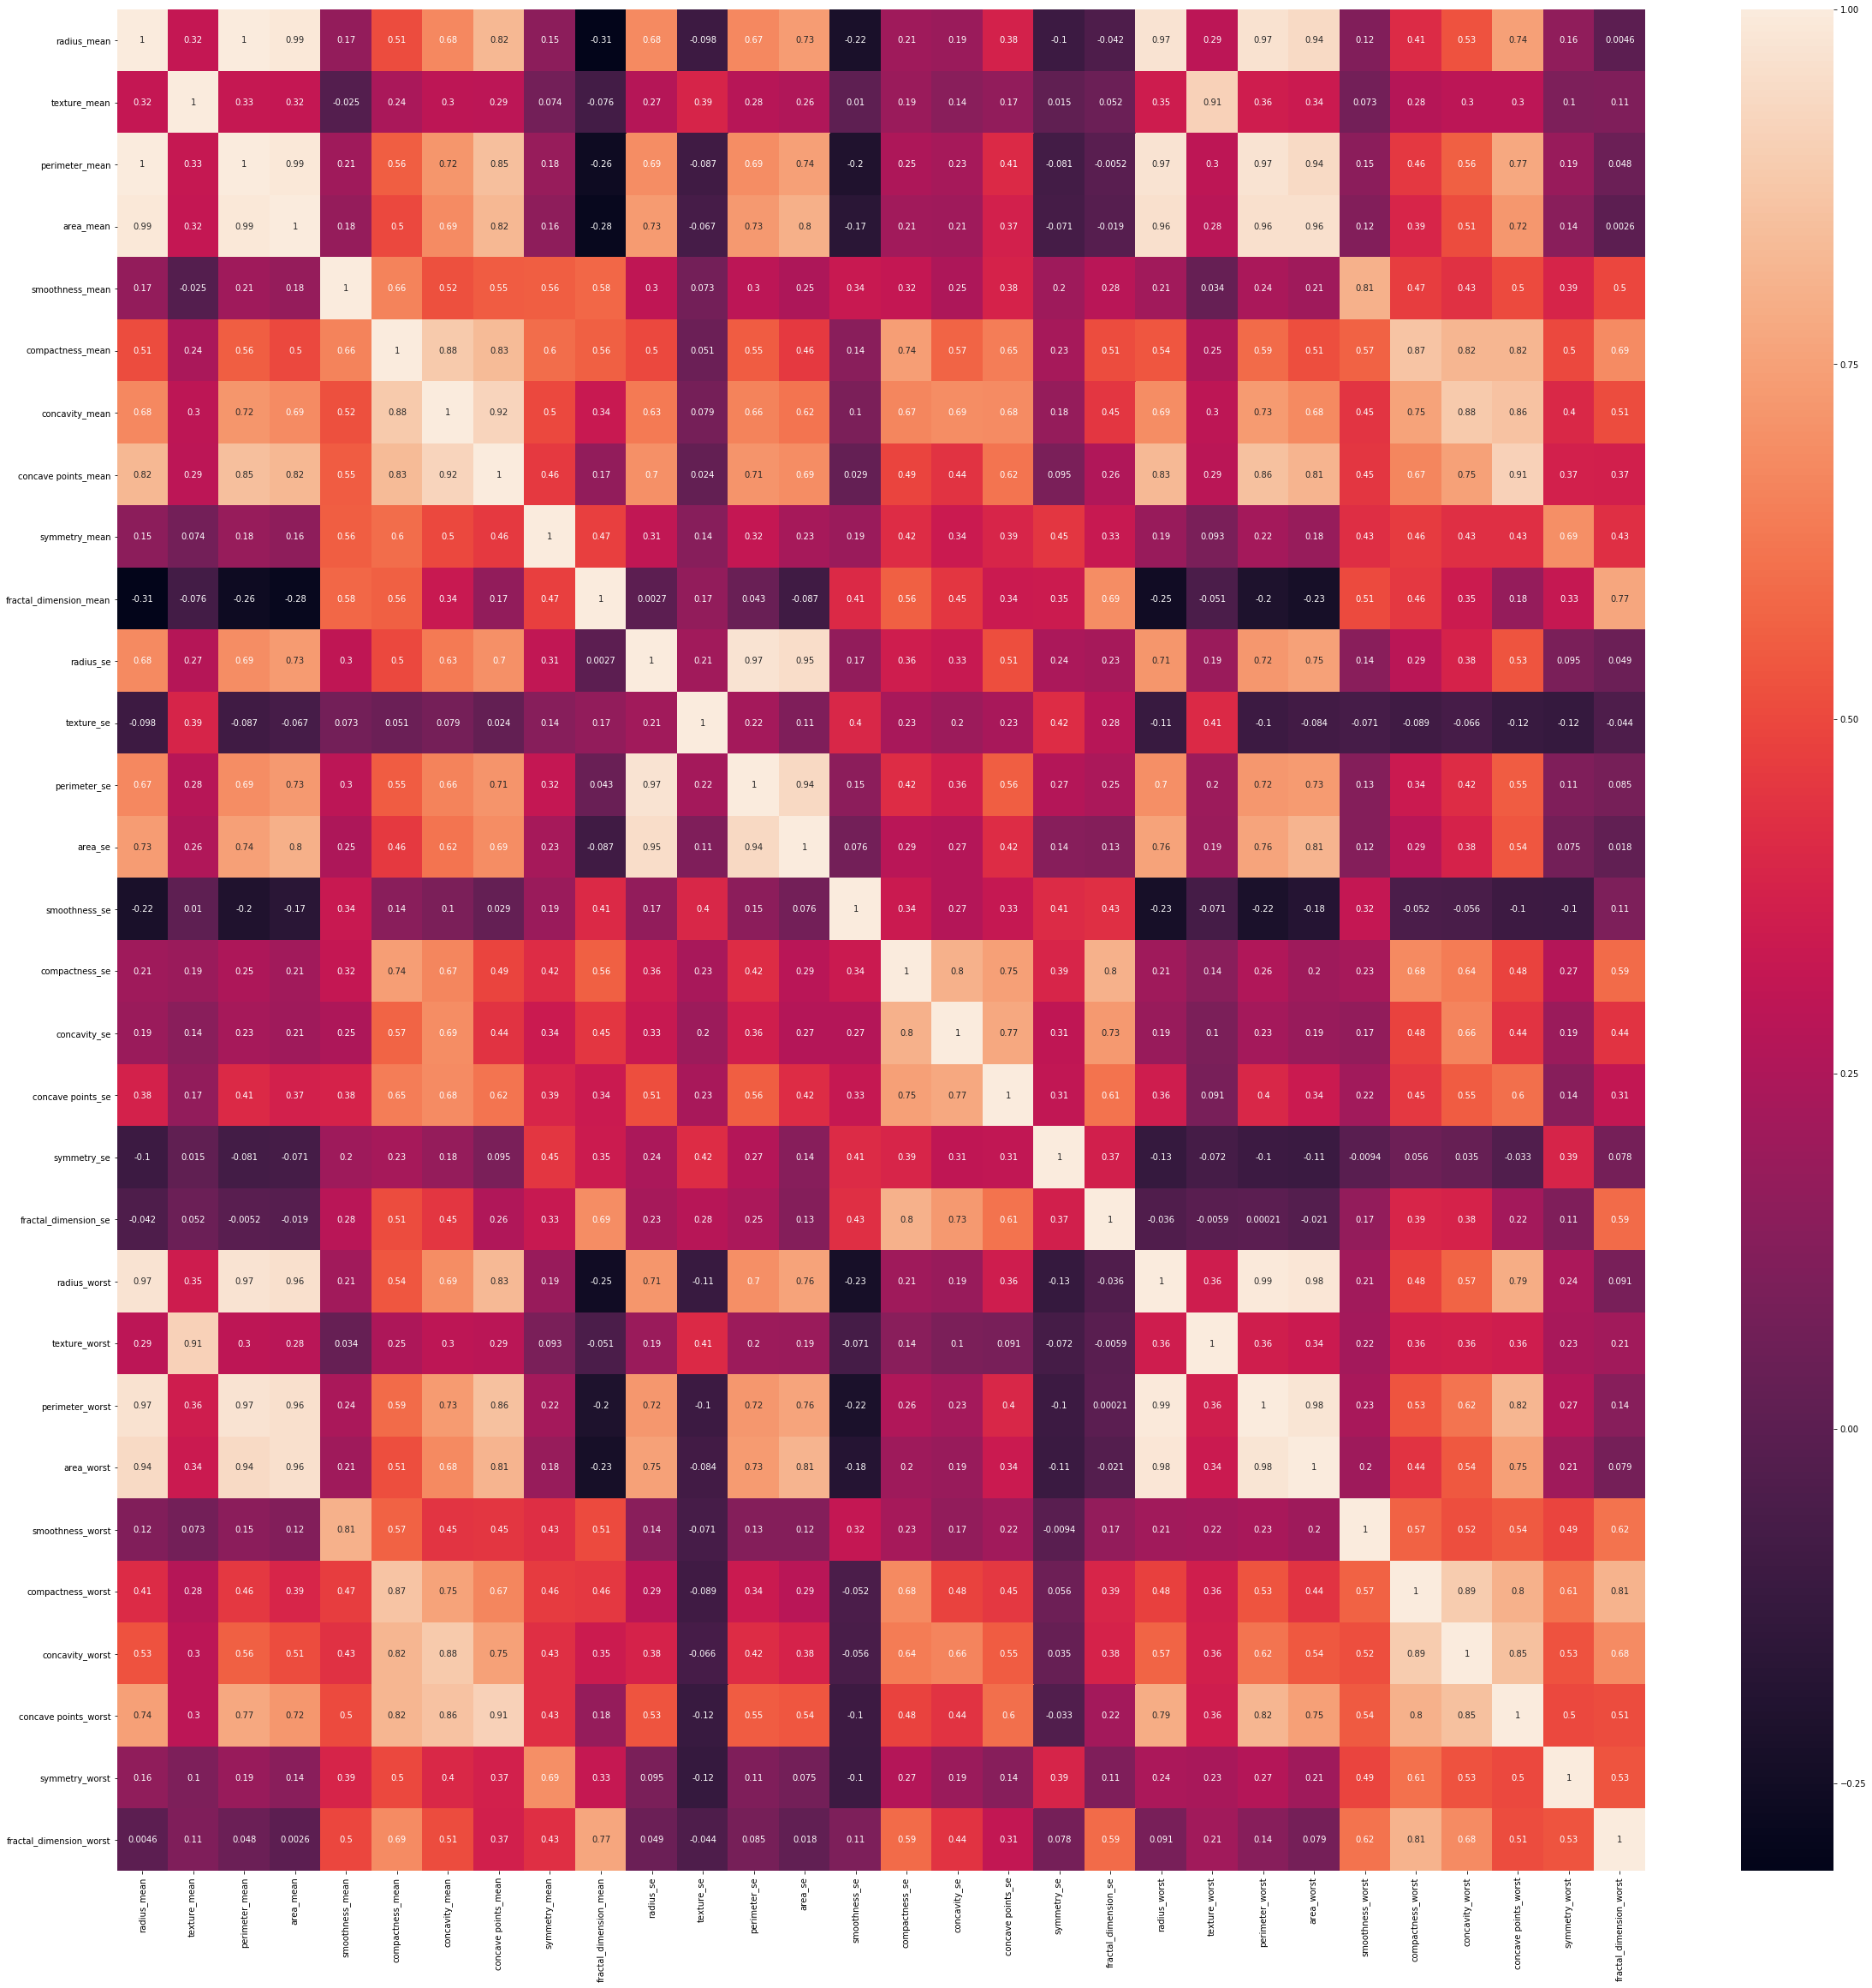

In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
f,ax = plt.subplots(figsize=(40,40))
sns.heatmap(df1.corr(),annot=True,ax=ax)


From Heatmap we conclude
   1. radius_mean , perimeter_mean , area_mean , radius_worst, perimeter_worst and  area_worst are highly correlated. From these we select one 
   feature and dump the remaining.
   
   2.concave_points mean , concavity mean , compactness mean , compactness worst are highly correlated. From these we select one feature and 
   dump the remaining.
   
   3.smoothness mean , smoothness worst are highly correlated. From these we select one feature and dump the remaining.
   
   4.texture mean , texture worst are highly correlated. From these we select one feature an dump the remaining.
   
   5.radius_se , perimeter_se , area_se are highly correlated. From these we select one feature and dump the remaining.
   
using these conclusions we have removed the un neccesary columns and created new data set "X".

In [0]:
newdataset = df1[["radius_mean","texture_mean","smoothness_mean","compactness_mean",
           "symmetry_mean","fractal_dimension_mean","radius_se","texture_se","smoothness_se","compactness_se",
           "concavity_se","concave points_se","symmetry_se","fractal_dimension_se","symmetry_worst","fractal_dimension_worst"]]


As the given data has 10 features and each feature has three different columns for their mean,standard error and worst . In these 
columns only mean value of feature looks prominent for prediction . So we are creating a dataset with mean values of features ,find correlation between them and modify the dataset.

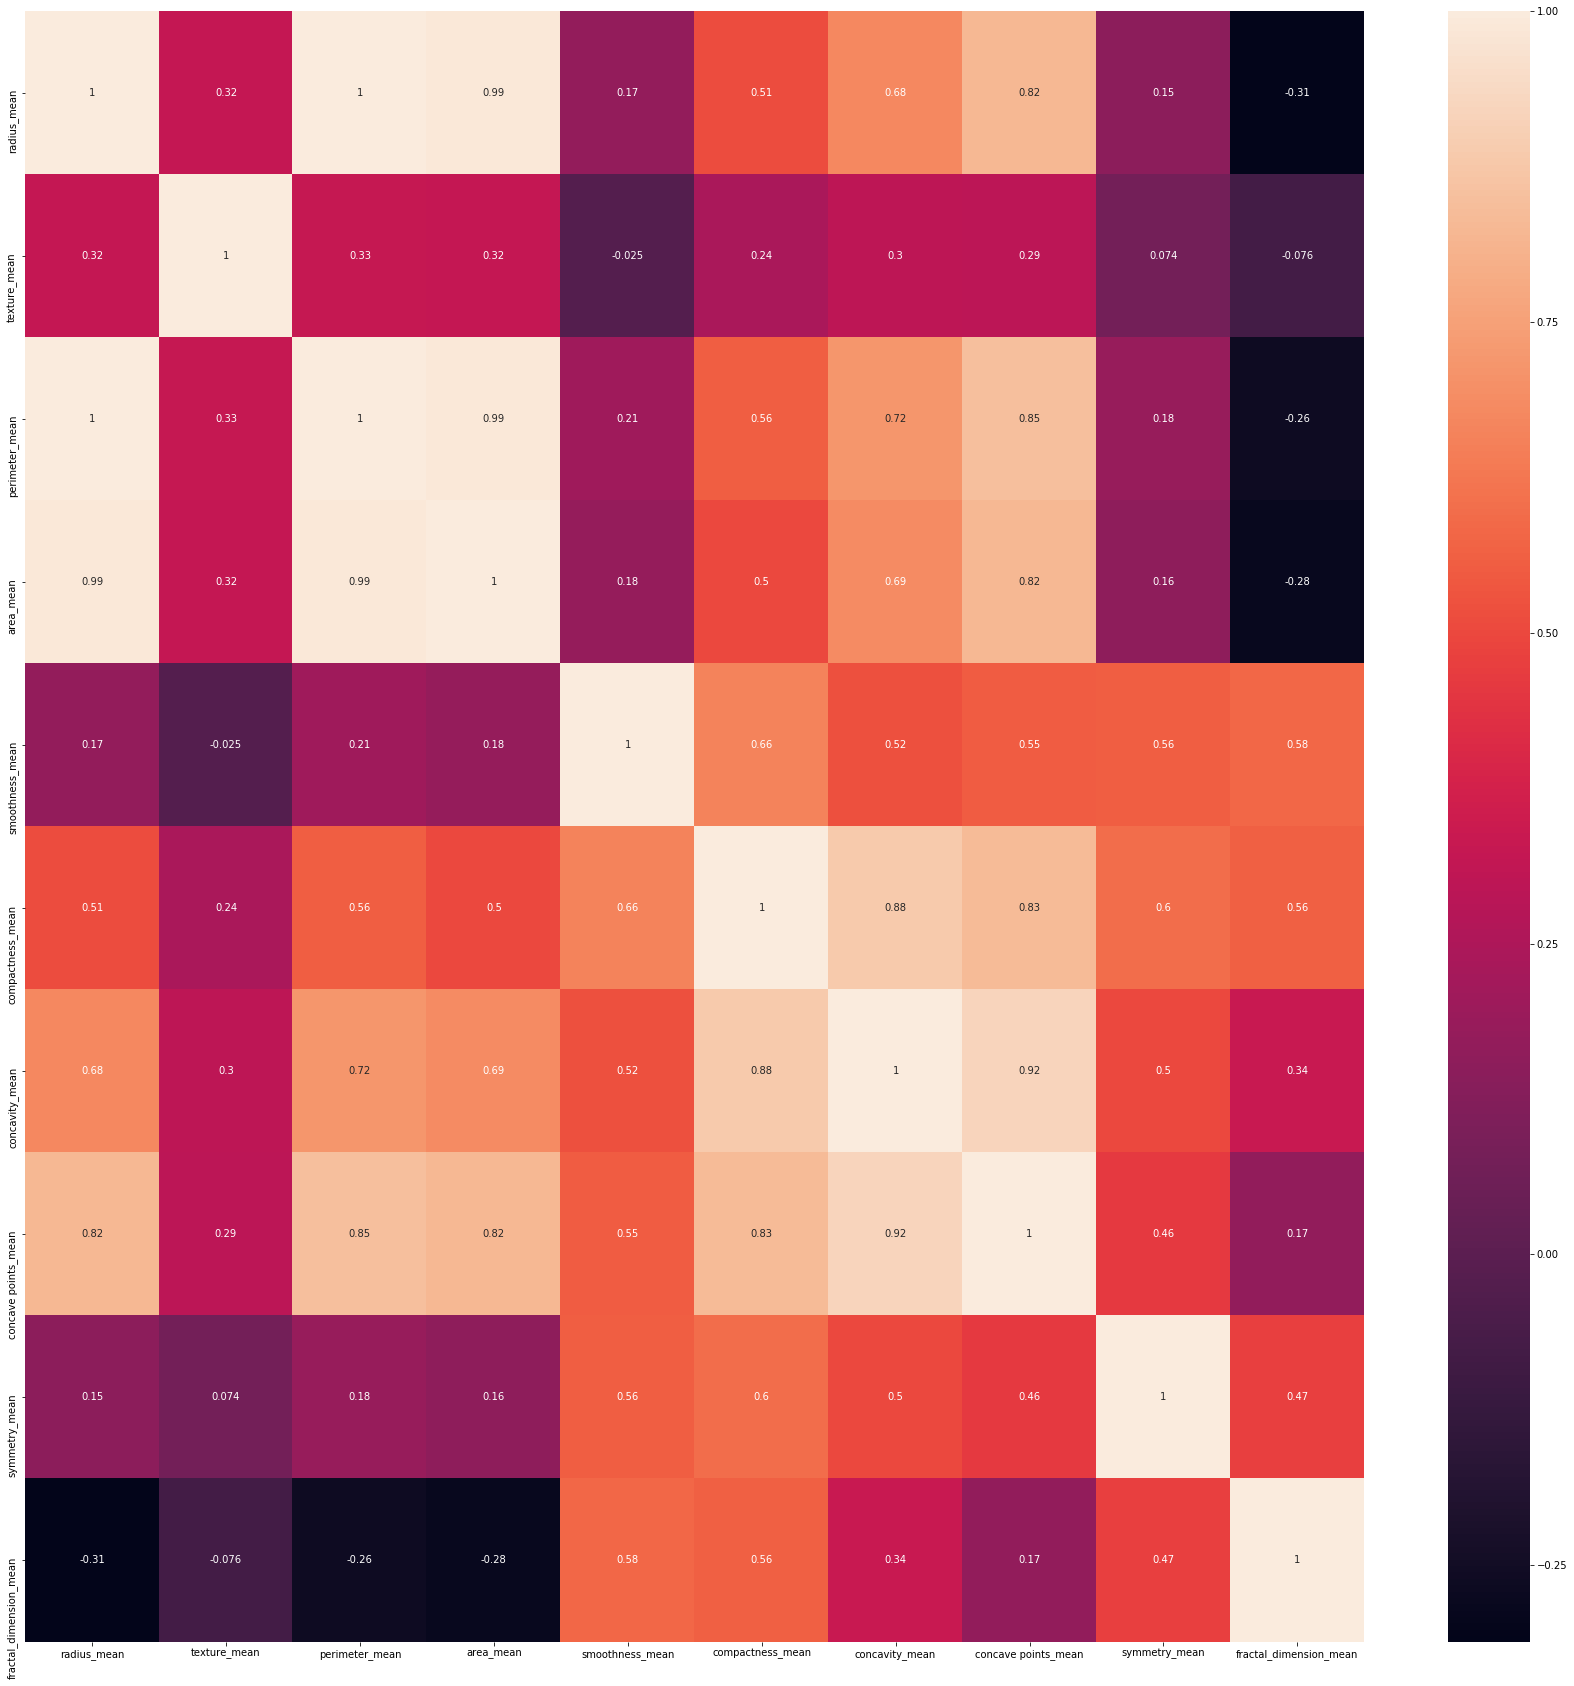

In [0]:
meandf = df[['radius_mean','texture_mean','perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
f,ax = plt.subplots(figsize=(30,30))
sns.heatmap(meandf.corr(),annot=True,ax=ax)




After analysing heat map we conclude 

    1.radius_mean , perimeter_mean and area_mean are highly correlated. From these we select one 
   feature and dump them.
   
    2.concave_points mean , concavity mean , compactness mean  are highly correlated. From these we select one feature and 
   dump the remaining.
   
from above conclusions, we have removed unneccesary columns and created new  dataset "newdf". 

In [0]:
newdf = meandf[["radius_mean","concavity_mean","texture_mean","smoothness_mean",
            "symmetry_mean","fractal_dimension_mean"]]

We use both the datasets we got from raw data, compare the prediction results of both data sets. Then we select the best dataset and best classifier for each dataset. Now we are going to apply machine learning techniques on newdf dataset.

                       STANDARDIZATION OF DATA

We have to standardize the data to give same level of priority to all features of data. Here we are standardizing the data using sklearn package and StandardScaler library.


In [0]:
from sklearn.preprocessing import StandardScaler
y = df["diagnosis"]
SCALE=StandardScaler()
SCALE.fit(newdf)
x=SCALE.transform(newdf)
d=pd.DataFrame(x)
d.columns=["radius_mean","concavity_mean","texture_mean","smoothness_mean",
           "symmetry_mean","fractal_dimension_mean"] 

                            SPLITTING OF DATA  INTO TRAIN AND TEST DATASETS

In [0]:
from sklearn import model_selection
x_train ,x_test ,y_train ,y_test = model_selection.train_test_split(d,y,test_size = 0.3,random_state = 6)

                                MACHINE LEARNING ALGORITHMS

First we are going to apply KNN classifier for the train dataset, create a model and from that model we predict the class for test dataset. 
we then check the accuracy of the prediction using metrics library of sklearn package.

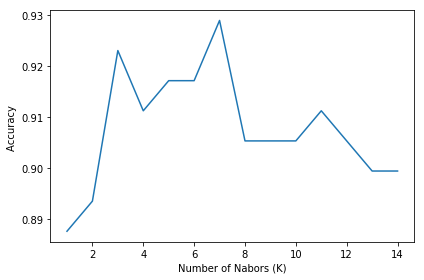

In [0]:
from  sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors =7).fit(x_train,y_train)
yhat = neigh.predict(x_test)
acc = metrics.accuracy_score(yhat,y_test)
Ks = 15
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
plt.plot(range(1,Ks),mean_acc)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

from the above plot, we can say for k equal to 3 knn accuracy is very high. So we use k equal to 3.

In [0]:
neigh = KNeighborsClassifier(n_neighbors =3).fit(x_train,y_train)
yhat = neigh.predict(x_test)
acc = metrics.accuracy_score(yhat,y_test)
print(acc) 

0.9230769230769231


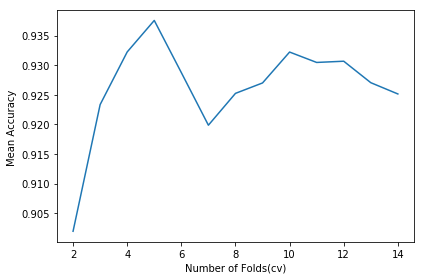

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(neigh,x,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

from above plot we conclude for cv equal to 5 mean accuracy is high .

In [0]:
sco = cross_val_score(neigh,x,y,cv = 5)
print(np.mean(sco))

0.937560363777178


                                       Decision Tree

we are going to apply Decision Tree classifier for the train dataset, create a model and from that model we predict the class for test dataset. we then check the accuracy of the prediction using metrics library of sklearn package.

In [0]:
from sklearn.tree import DecisionTreeClassifier
cancertree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
cancertree.fit(x_train,y_train)
predtree=cancertree.predict(x_test)
print(predtree)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predtree))

[1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0]
DecisionTrees's Accuracy:  0.8994082840236687


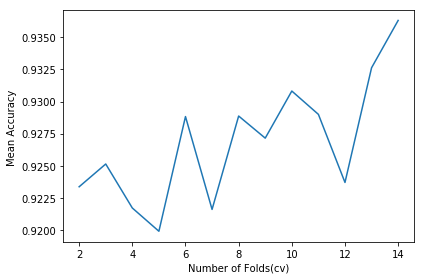

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(cancertree,x,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

from above plot mean accuracy is maximum at cv equal to 9. so we write code for cv = 9 and find out the meanaccuracy

In [0]:
from sklearn.model_selection import cross_val_score
sco = cross_val_score(cancertree,x,y,cv = 14)
print( np.mean(sco))

0.9363195747342088


                               LOGISTIC REGRESSION

we are going to apply Logistic regression classifier for the train dataset, create a model and from that model we predict the class for 
test dataset. we then check the accuracy of the prediction using metrics library of sklearn package.

In [0]:
from sklearn import model_selection
from sklearn.metrics import jaccard_similarity_score
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01,solver='liblinear')
LR.fit(x_train,y_train)
yhat=LR.predict(x_test)
print(yhat)
jaccard_similarity_score(y_test,yhat)

[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0]


0.9289940828402367

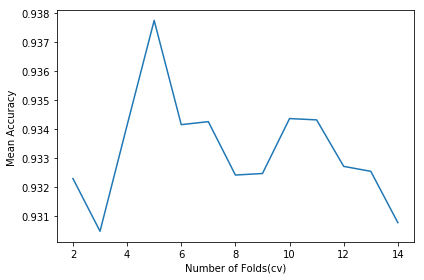

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(LR,x,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

from above plot mean accuracy is maximum at cv equal to 5.

In [0]:
sco = cross_val_score(LR,x,y,cv = 5)
print(np.mean(sco))

0.9377356180453527


                               SUPPORT VECTOR MACHINES

we are going to apply SVM classifier for the train dataset, create a model and from that model we predict the class for 
test dataset. we then check the accuracy of the prediction using metrics library of sklearn package.

In [0]:
from sklearn import model_selection
from sklearn.metrics import jaccard_similarity_score
from sklearn import svm
sm=svm.SVC(kernel='rbf',gamma='auto')
sm.fit(x_train,y_train)
yhat=sm.predict(x_test)
print(yhat)
jaccard_similarity_score(y_test,yhat)

[1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0]


0.9289940828402367

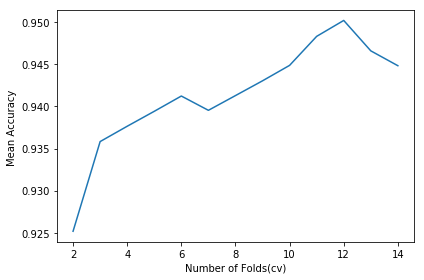

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(sm,x,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

In [0]:
sco = cross_val_score(sm,x,y,cv = 12)
print(np.mean(sco))

0.950224522047487


from the above plot mean accuracy is maximum at cv=12

In [0]:
data=svm.SVC(kernel='linear')
data.fit(x_train,y_train)
yhat=data.predict(x_test)
print(yhat)
jaccard_similarity_score(y_test,yhat)

[1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0]


0.9289940828402367

In [0]:
spm=svm.SVC(kernel='poly',gamma='auto')
spm.fit(x_train,y_train)
yhat=spm.predict(x_test)
print(yhat)
jaccard_similarity_score(y_test,yhat)

[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0]


0.8994082840236687

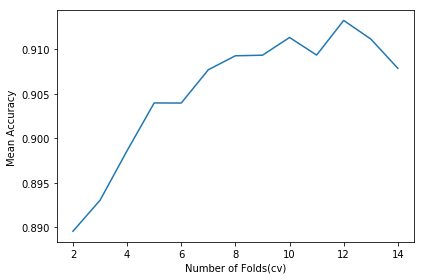

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(spm,x,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

from the above plot the maximum mean accuracy is at cv=12

In [0]:
sco = cross_val_score(spm,x,y,cv = 12)
print(np.mean(sco))

0.9132458371877891


In [0]:
ssm=svm.SVC(kernel='sigmoid',gamma='auto')
ssm.fit(x_train,y_train)
yhat=ssm.predict(x_test)
print(yhat)
jaccard_similarity_score(y_test,yhat)

[1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0]


0.8816568047337278

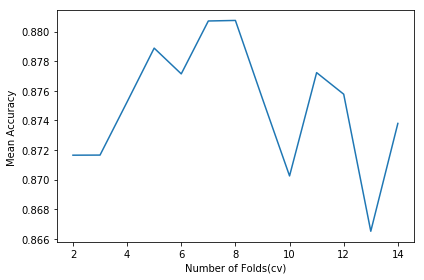

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(ssm,x,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

from the above plot maximum mean accuracy occurs at cv=8

In [0]:
sco = cross_val_score(ssm,x,y,cv = 8)
print(np.mean(sco))

0.8807544542618027


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RFC=RandomForestClassifier(n_estimators = 100, random_state=43)
RFC.fit(x_train,y_train)
yhat=RFC.predict(x_test)
ac=metrics.accuracy_score(y_test,yhat)
print(ac)

0.9349112426035503


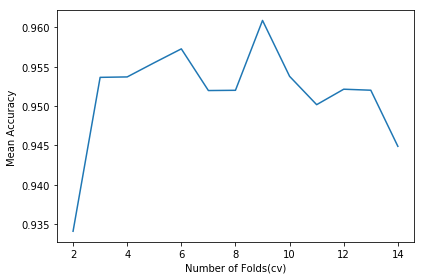

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(RFC,x,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

from the above plot maximum mean accuracy occurs at cv=9.

In [0]:
sco = cross_val_score(RFC,x,y,cv = 9)
print(np.mean(sco))

0.9608863856175682


Now we are using the different dataset i.e X dataset , we split the dataset and apply machine learning algorithms on it and find out the best algorithm for prediction.

                              STANDARDISATION OF X DATASET

In [0]:
from sklearn.preprocessing import StandardScaler
SCALE = StandardScaler()
SCALE.fit(newdataset)
newarray = SCALE.transform(newdataset)
X = pd.DataFrame(newarray)
X.columns = ["radius_mean","texture_mean","smoothness_mean","compactness_mean",
           "symmetry_mean","fractal_dimension_mean","radius_se","texture_se","smoothness_se","compactness_se",
           "concavity_se","concave points_se","symmetry_se","fractal_dimension_se","symmetry_worst","fractal_dimension_worst"]

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
0,1.095893,-2.080336,1.573729,3.296185,2.236960,2.261815,2.479673,-0.569534,-0.214433,1.312812,0.720415,0.662190,1.144691,0.899230,2.779745,1.950607
1,1.826651,-0.357256,-0.815825,-0.481629,0.010097,-0.863895,0.497749,-0.879055,-0.603838,-0.691506,-0.438280,0.262828,-0.805402,-0.101993,-0.234486,0.288812
2,1.577400,0.454154,0.949009,1.061320,0.952937,-0.393053,1.224035,-0.783346,-0.297024,0.812290,0.212146,1.423726,0.234889,0.288939,1.170853,0.208725
3,-0.764992,0.251302,3.284611,3.415808,2.889977,4.918101,0.325611,-0.116810,0.684779,2.736346,0.815406,1.114907,4.721071,2.033648,6.096866,4.959412
4,1.747344,-1.157008,0.288794,0.546750,-0.000909,-0.557564,1.265722,-0.793458,1.474203,-0.048853,0.824311,1.144011,-0.361979,0.493624,-0.863061,-0.391924


                         SPLITTING DATASET INTO TRAIN AND TEST DATASETS

In [0]:
from sklearn import model_selection
x_train ,x_test ,y_train ,y_test = model_selection.train_test_split(X,y,test_size = 0.25,random_state = 6)

                                     KNN CLASSIFIER

0.8936170212765957


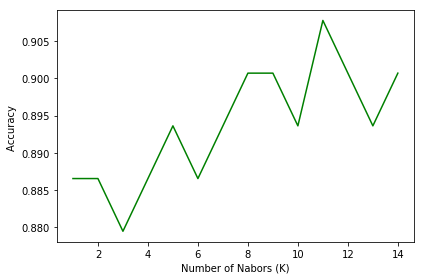

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh = KNeighborsClassifier(n_neighbors =7).fit(x_train,y_train)
yhat = neigh.predict(x_test)
acc = metrics.accuracy_score(yhat,y_test)
print(acc)
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

From above plot accuracy is maximum at K = 11.

In [0]:
neigh = KNeighborsClassifier(n_neighbors = 11).fit(x_train,y_train)
yhat=neigh.predict(x_test)
acc = metrics.accuracy_score(yhat,y_test)
print(acc)

0.9078014184397163


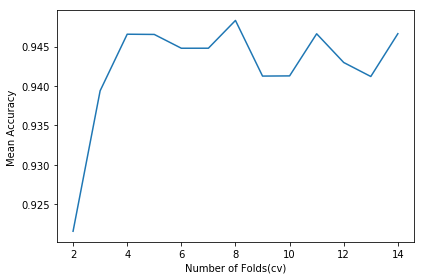

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(neigh,X,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

In [0]:
sco = cross_val_score(neigh,X,y,cv = 8)
print(np.mean(sco))

0.9483119732890095


In [0]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
cancertree1 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
cancertree1.fit(x_train,y_train)
predtree=cancertree1.predict(x_test)
print(predtree)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predtree))

[1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1]
DecisionTrees's Accuracy:  0.851063829787234


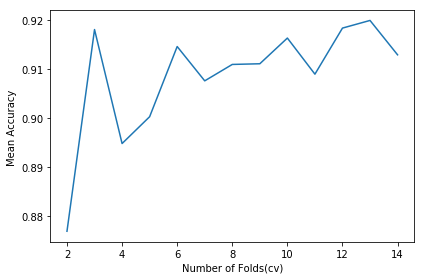

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(cancertree1,X,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

from above  plot mean accuracy is maximum at cv = 12

In [0]:
sco = cross_val_score(cancertree1,X,y,cv = 13)
print(np.mean(sco))

0.9216442472256426


                                      LOGISTIC REGRESSION

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
LR1=LogisticRegression(C=0.03,solver='liblinear')
LR1.fit(x_train,y_train)
yhat=LR1.predict(x_test)
print(yhat)
#jaccard_similarity_score(y_test,yhat)
accuracy_score(y_test,yhat)

[1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0]


0.7163120567375887

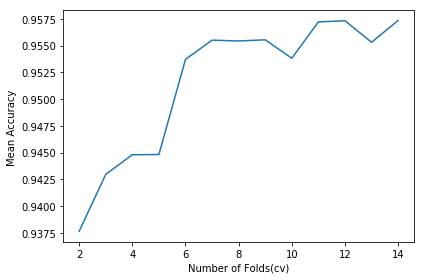

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(LR1,X,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

In [0]:
sco = cross_val_score(LR1,X,y,cv = 12) # from plot Mean accuaracy is max at cv = 13
print(np.mean(sco))

0.9573199326755061


In [0]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import jaccard_similarity_score
data1=svm.SVC(kernel='rbf',gamma='auto')
data1.fit(x_train,y_train)
yhat=data1.predict(x_test)
print(yhat)
jaccard_similarity_score(y_test,yhat)

[1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0
 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1]


0.900709219858156

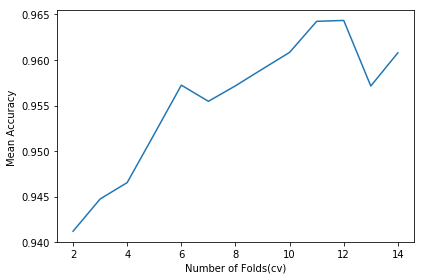

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(data1,X,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

In [0]:
sco = cross_val_score(data1,X,y,cv = 12) # from plot mean acuuracy is max at cv = 6
print(np.mean(sco))

0.9643382541885086


In [0]:
slm1=svm.SVC(kernel='linear')
slm1.fit(x_train,y_train)
yhat=slm1.predict(x_test)
print(yhat)
jaccard_similarity_score(y_test,yhat)

[1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0
 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1]


0.9078014184397163

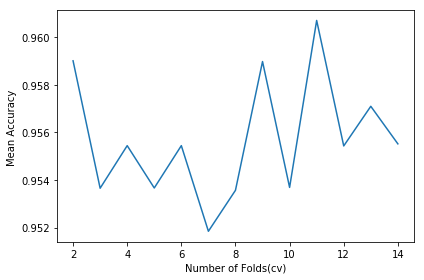

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(slm1,X,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

In [0]:
sco = cross_val_score(slm1,X,y,cv = 11) # from plot mean accuracy is max at cv = 12
print(np.mean(sco))

0.9607088989441931


In [0]:
ssm1=svm.SVC(kernel='sigmoid',gamma='auto')
ssm1.fit(x_train,y_train)
yhat=ssm1.predict(x_test)
print(yhat)
jaccard_similarity_score(y_test,yhat)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.5957446808510638

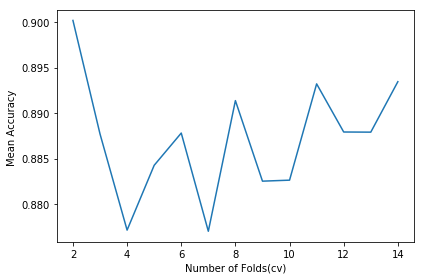

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(ssm1,X,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

In [0]:
sco = cross_val_score(ssm1,X,y,cv = 11)
print(np.mean(sco))

0.8932071849718909


In [0]:
pol=svm.SVC(kernel='poly',gamma='auto')
pol.fit(x_train,y_train)
yhat=pol.predict(x_test)
print(yhat)
ac = jaccard_similarity_score(y_test,yhat)
print(ac)

[1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1]
0.9361702127659575


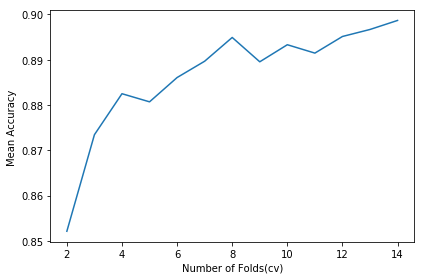

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(pol,X,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

In [0]:
#from above plot mean accuracy is max at cv = 10
sco = cross_val_score(pol,X,y,cv = 14)
print(np.mean(sco))

0.8986755114803895


In [0]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 100 ,random_state=43)
rfc.fit(x_train,y_train)
yhat=rfc.predict(x_test)
metrics.accuracy_score(y_test,yhat)

0.9078014184397163

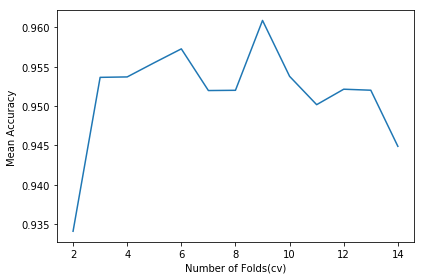

In [0]:
from sklearn.model_selection import cross_val_score
c = 15
mean_score = np.zeros((c-2))
for n in range(2,c):
    
    #Train Model and Predict  
    sco = cross_val_score(rfc,x,y,cv = n)
    mean_score[n-2] = np.mean(sco)
    
plt.plot(range(2,c),mean_score)
plt.ylabel('Mean Accuracy ')
plt.xlabel('Number of Folds(cv)')
plt.tight_layout()
plt.show()

In [0]:
sco = cross_val_score(rfc,x,y,cv = 9)
print(np.mean(sco))

0.9608863856175682


                                                         OBSERVATIONS

1.For the data set newdf(6 columns) random forest classifier with k-fold cross validation gives the best prediction with accuracy of 0.9490

2.For the data set X(16 columns) svm(poly) with k-fold cross validation gives the best prediction with accuracy of 0.9596

3.We thought increase in number of features would improve the prediction accuracy, but it  happened in svm(poly) classifier only. In other 
classifiers the prediction accuracy decreased.

4.SVM has limitation of large data. for large data(>1000 rows) svm is not effective,in that case go for the Random Forest Classifier for better prediction
accuracy.


                                           CONCLUSIONS
                                           

For the taken dataset SVM(Poly) classifier with  k-fold cross validation for X dataset(modified from taken dataset) gives the best prediction.

                                     TESTING THE SELECTED MODEL

In [0]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
def change(value) :
    if(value == 1):
       return "Malignant" 
    else :
       return "Benign"
test = pd.read_excel("testing.xlsx")
test1 = StandardScaler()
test1.fit(test)
test2 = test1.transform(test)
test3 = pd.DataFrame(test)
test3.columns = ["radius_mean","texture_mean","smoothness_mean","compactness_mean",
           "symmetry_mean","fractal_dimension_mean","radius_se","texture_se","smoothness_se","compactness_se",
           "concavity_se","concave points_se","symmetry_se","fractal_dimension_se","symmetry_worst","fractal_dimension_worst"]
pred = pol.predict(test3)
pred.tolist()
pred1 = map(change,pred)
print(list(pred1))
print("accuracy of this prediction is : ",ac)

['Malignant', 'Malignant', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant']
accuracy of this prediction is :  0.9361702127659575
